
# Convolutional Neural Network (CNN) model for classifying images of fruits into three categories (strawberries, pomegranates, and peaches).





A 3MTT Capstone Project.
        By
 
 JOHN OSITADINMA MOORE
 
 
 Fellow ID : FE/23/3921703



Implementing these steps in a Python Jupyter Notebook:

In [54]:
#necessary libraries
import pandas as pd
import numpy  as np
import os
import re


In [59]:
#define a regular expression for each category
strawberries_pattern = r"\b(fresh_strawberry)"
pomegranates_pattarn = r"\b(fresh_pomegranate)"
peaches_pattern = r"\b(fresh_peach)"

#Define a function to categorize fruits based on the filename

def categorize_fruits(item):
    if re.search(strawberries_pattern, item, re.IGNORECASE):
        return 'fresh_strawberry'
    elif re.search(pomegranates_pattarn, item, re.IGNORECASE):
        return 'fresh_pomegranate'
    elif re.search(peaches_pattern, item, re.IGNORECASE):
        return 'fresh_peach'
    else:
        return 'Other'


In [60]:
data_path = '/Users/crys.d/Downloads/fruits'

In [61]:
#looping through all the filename to get the category
data = []

for filename in os.listdir(data_path):
  category = categorize_fruits(filename)
  data.append([filename, category])

In [124]:
#data

In [63]:

pd.DataFrame(data, columns = ['Filename', 'Category'])

,Filename,Category
0,fresh_pomegranate_75.jpg,fresh_pomegranate
1,fresh_pomegranate_61.jpg,fresh_pomegranate
2,fresh_strawberry_178.jpg,fresh_strawberry
3,fresh_strawberry_150.jpg,fresh_strawberry
4,fresh_pomegranate_49.jpg,fresh_pomegranate
...,...,...
809,fresh_pomegranate_50.jpg,fresh_pomegranate
810,fresh_strawberry_149.jpg,fresh_strawberry
811,fresh_strawberry_161.jpg,fresh_strawberry
812,fresh_pomegranate_78.jpg,fresh_pomegranate


In [64]:
#converting it to a dataframe
df = pd.DataFrame(data, columns = ['Filename', 'Category'])

In [65]:
df.head()

,Filename,Category
0,fresh_pomegranate_75.jpg,fresh_pomegranate
1,fresh_pomegranate_61.jpg,fresh_pomegranate
2,fresh_strawberry_178.jpg,fresh_strawberry
3,fresh_strawberry_150.jpg,fresh_strawberry
4,fresh_pomegranate_49.jpg,fresh_pomegranate


In [99]:
df. Category. value_counts()

Category
fresh_pomegranate    312
fresh_peach          251
fresh_strawberry     250
Other                  1
Name: count, dtype: int64

In [100]:
#df.query('Category == "Other"')

In [101]:
desired_categoroise=['fresh_strawberry','fresh_pomegranate','fresh_peach']

In [121]:
new_df = df[df. Category.isin(desired_categoroise)]

In [123]:

new_df.Category.unique()

new_df.shape

(813, 2)

Image PreProcessing

In [104]:
#necessary libraries
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
# data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [120]:
813 * 8

6504

In [106]:
images_dir = data_path

In [107]:
# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=new_df,
    directory=images_dir,  
    x_col='Filename',
    y_col='Category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed = 42)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=new_df,
    directory=images_dir,  
    x_col='Filename',
    y_col='Category',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed = 42)
    

Found 651 validated image filenames belonging to 3 classes.
Found 162 validated image filenames belonging to 3 classes.


In [108]:
train_generator

Model Configuration

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [110]:
#the CNN configuration
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

/Users/crys.d/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [111]:
# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,792,739 (10.65 MB)

 Trainable params: 2,792,739 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
#training the model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10


/Users/crys.d/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - accuracy: 0.4000 - loss: 1.3064 - val_accuracy: 0.6543 - val_loss: 0.7736
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 382ms/step - accuracy: 0.5923 - loss: 0.8791 - val_accuracy: 0.6852 - val_loss: 0.7077
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.7453 - loss: 0.6847 - val_accuracy: 0.8519 - val_loss: 0.5455
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 780ms/step - accuracy: 0.7715 - loss: 0.6721 - val_accuracy: 0.8642 - val_loss: 0.4773
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.7879 - loss: 0.5748 - val_accuracy: 0.8025 - val_loss: 0.4372
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.8314 - loss: 0.4439 - val_accuracy: 0.8210 - val_loss: 0.4411
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 418ms/step - accuracy: 0.8142 - loss: 0.4920 - val_accuracy: 0.8765 - val_loss: 0.3372
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.8305 - loss: 0.4750 - val_accuracy: 0.913

In [114]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {int(val_accuracy* 100)}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9109 - loss: 0.2369
Validation loss: 0.26673269271850586
Validation accuracy: 90


In [82]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_category(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0

    # Make a prediction
    prediction = model.predict(img_preprocessed)

    # Assuming your model's classes are accessible via train_generator.class_indices
    # which is a dictionary mapping class names to their indices.
    # We need to invert this dictionary to map indices back to class names.
    label_map = dict((v, k) for k, v in train_generator.class_indices.items())

    # Find the index of the maximum score in the prediction array
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_class_name = label_map[predicted_class_index[0]]

    return predicted_class_name

# # Example usage
# image_path = 'path/to/your/image.jpg'
# predicted_category = predict_image_category(image_path, model)
# print(f"The predicted category is: {predicted_category}")


In [83]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_image_with_prediction(image_path, model):
    # Predict the image category
    predicted_category = predict_image_category(image_path, model)

    # Load the image for display
    img = image.load_img(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks

    # Add a rectangle for the text background, if desired
    plt.gca().add_patch(Rectangle((0, 0), 120, 30, color='white'))

    # Add the predicted category text
    plt.text(5, 20, predicted_category, color='red', weight='bold', fontsize=20)

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


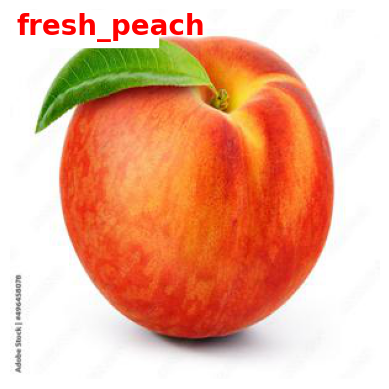

In [84]:
# Example usage
image_path = '//Users/crys.d/Downloads/fruits/fresh_peach_6 2.jpg'
display_image_with_prediction(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


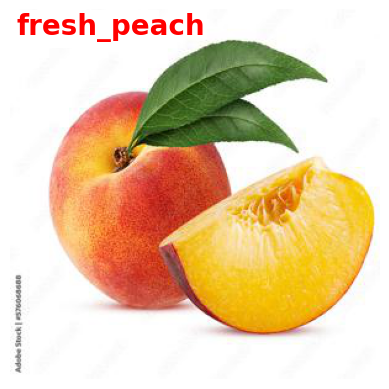

In [85]:
# Example usage
image_path = '//Users/crys.d/Downloads/fruits/fresh_peach_12.jpg'
display_image_with_prediction(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


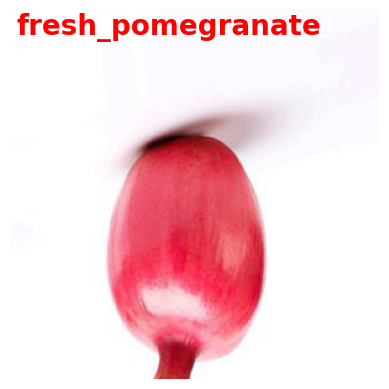

In [86]:
# Example usage
image_path = '/Users/crys.d/Downloads/fruits/fresh_pomegranate_111 2.jpg'
display_image_with_prediction(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


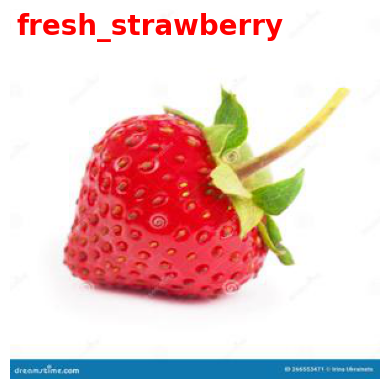

In [87]:
# Example usage
image_path = '/Users/crys.d/Downloads/fruits/fresh_strawberry_163.jpg'
display_image_with_prediction(image_path, model)

In [125]:
#Save the model
model.save('fruit_classification_model.h5')